# Sprint 11: Training and test sets

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

## Level 1

### Exercise 1

##### Working with dataset Delayed Flights. Split to train and test sample. Study of these two groups and description.

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [3]:
#extracting columns I need
#UniqueCarrier,Cancelled,ArrDelay,DepDelay 
df_flights = df[['Cancelled','UniqueCarrier','ArrDelay','DepDelay','Distance','CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df_flights.head(5)

,Cancelled,UniqueCarrier,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,WN,-14.0,8.0,810,NaN,NaN,NaN,NaN,NaN
1,0,WN,2.0,19.0,810,NaN,NaN,NaN,NaN,NaN
2,0,WN,14.0,8.0,515,NaN,NaN,NaN,NaN,NaN
3,0,WN,34.0,34.0,515,2.0,0.0,0.0,0.0,32.0
4,0,WN,11.0,25.0,688,NaN,NaN,NaN,NaN,NaN


In [4]:
#deleting rows with cancelled flights
df_flights = df_flights.loc[df_flights['Cancelled'] == 0]
df_flights.drop('Cancelled',axis=1, inplace=True)
df_flights.reset_index()
df_flights.tail(5)

,UniqueCarrier,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,DL,25.0,30.0,906,3.0,0.0,0.0,0.0,22.0
1936754,DL,75.0,57.0,481,0.0,57.0,18.0,0.0,0.0
1936755,DL,99.0,80.0,689,1.0,0.0,19.0,0.0,79.0
1936756,DL,9.0,11.0,533,NaN,NaN,NaN,NaN,NaN
1936757,DL,-5.0,7.0,874,NaN,NaN,NaN,NaN,NaN


In [6]:
#type of data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936125 entries, 0 to 1936757
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   UniqueCarrier      object 
 1   ArrDelay           float64
 2   DepDelay           float64
 3   Distance           int64  
 4   CarrierDelay       float64
 5   WeatherDelay       float64
 6   NASDelay           float64
 7   SecurityDelay      float64
 8   LateAircraftDelay  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 147.7+ MB


In [5]:
#Do I have complete values dataset?
a = df_flights['UniqueCarrier'].isnull().sum()
b = df_flights['ArrDelay'].isnull().sum()
c = df_flights['DepDelay'].isnull().sum()
d = df_flights['Distance'].isnull().sum()
e = df_flights['CarrierDelay'].isnull().sum()
f = df_flights['WeatherDelay'].isnull().sum()
g = df_flights['NASDelay'].isnull().sum()
h = df_flights['SecurityDelay'].isnull().sum()
i = df_flights['LateAircraftDelay'].isnull().sum()
print(a, b, c, d, e, f, g, h, i)

0 7754 0 0 688637 688637 688637 688637 688637


In [6]:
#How do these rows look like?
d = pd.isnull(df_flights['ArrDelay'])
df_flights[d].head(5)

,UniqueCarrier,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,WN,NaN,7.0,480,NaN,NaN,NaN,NaN,NaN
1372,WN,NaN,265.0,447,NaN,NaN,NaN,NaN,NaN
1776,WN,NaN,44.0,335,NaN,NaN,NaN,NaN,NaN
1831,WN,NaN,32.0,358,NaN,NaN,NaN,NaN,NaN
2244,WN,NaN,139.0,345,NaN,NaN,NaN,NaN,NaN


In [7]:
#Replace NaN values with 0
df_flights['ArrDelay'] = df_flights['ArrDelay'].replace(np.nan, 0)
df_flights['CarrierDelay'] = df_flights['CarrierDelay'].replace(np.nan, 0)
df_flights['WeatherDelay'] = df_flights['WeatherDelay'].replace(np.nan, 0)
df_flights['NASDelay'] = df_flights['NASDelay'].replace(np.nan, 0)
df_flights['SecurityDelay'] = df_flights['SecurityDelay'].replace(np.nan, 0)
df_flights['LateAircraftDelay'] = df_flights['LateAircraftDelay'].replace(np.nan, 0)

In [8]:
df_flights.isnull().values.any()

False

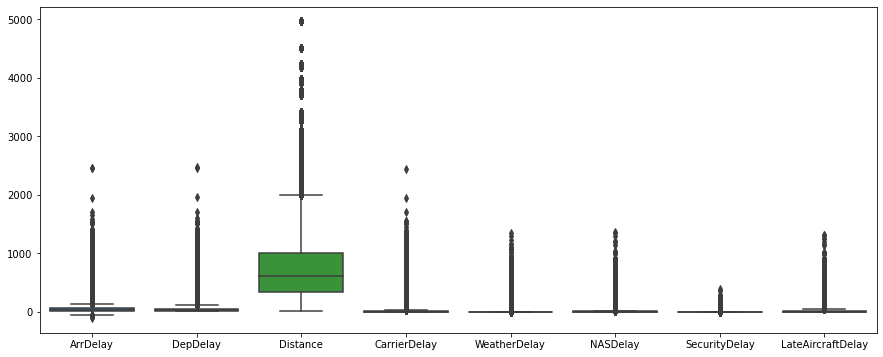

In [9]:
#values are normally distributed?
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(data=df_flights)

In [10]:
from scipy.stats import shapiro
data = df_flights['DepDelay']
stat,p = shapiro(data)
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Probably not Gaussian


Interpretation: 
- All values are probably not normally distributed
- There are different units for each values

#### Scaling of dataset

##### What is the relationship between the delays of Southwest Airlines flights, can we create a predictive model?

In [8]:
# extracting Southwest Airlines data
df_WN = df_flights.loc[df_flights['UniqueCarrier'] == 'WN']
df_WN.reset_index()
df_WN.count()

UniqueCarrier        377587
ArrDelay             377587
DepDelay             377587
Distance             377587
CarrierDelay         377587
WeatherDelay         377587
NASDelay             377587
SecurityDelay        377587
LateAircraftDelay    377587
dtype: int64

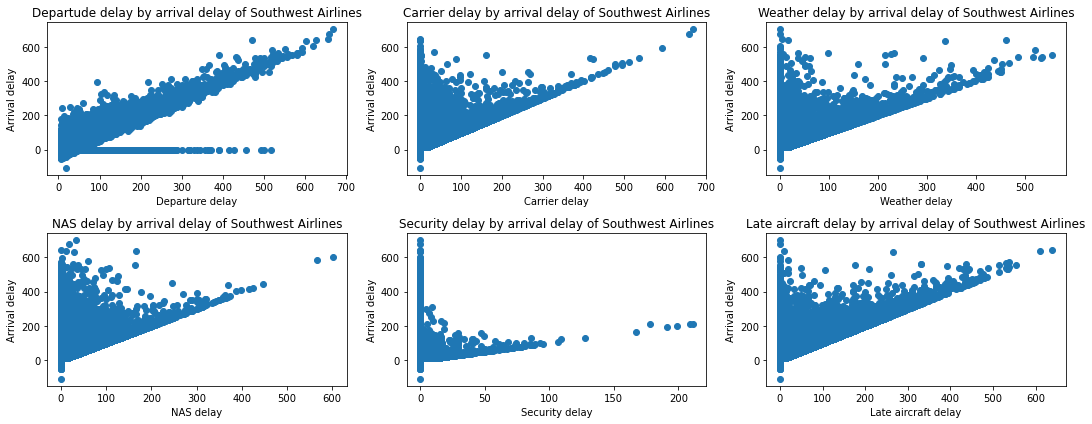

In [76]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,6))

axes[0,0].plot(df_WN['DepDelay'],df_WN['ArrDelay'],'o')
axes[0,0].set_xlabel("Departure delay")
axes[0,0].set_ylabel("Arrival delay")
axes[0,0].set_title("Departude delay by arrival delay of Southwest Airlines")

axes[0,1].plot(df_WN['CarrierDelay'],df_WN['ArrDelay'],'o')
axes[0,1].set_xlabel("Carrier delay")
axes[0,1].set_ylabel("Arrival delay")
axes[0,1].set_title("Carrier delay by arrival delay of Southwest Airlines")

axes[0,2].plot(df_WN['WeatherDelay'],df_WN['ArrDelay'],'o')
axes[0,2].set_xlabel("Weather delay")
axes[0,2].set_ylabel("Arrival delay")
axes[0,2].set_title("Weather delay by arrival delay of Southwest Airlines")

axes[1,0].plot(df_WN['NASDelay'],df_WN['ArrDelay'],'o')
axes[1,0].set_xlabel("NAS delay")
axes[1,0].set_ylabel("Arrival delay")
axes[1,0].set_title("NAS delay by arrival delay of Southwest Airlines")

axes[1,1].plot(df_WN['SecurityDelay'],df_WN['ArrDelay'],'o')
axes[1,1].set_xlabel("Security delay")
axes[1,1].set_ylabel("Arrival delay")
axes[1,1].set_title("Security delay by arrival delay of Southwest Airlines")

axes[1,2].plot(df_WN['LateAircraftDelay'],df_WN['ArrDelay'],'o')
axes[1,2].set_xlabel("Late aircraft delay")
axes[1,2].set_ylabel("Arrival delay")
axes[1,2].set_title("Late aircraft delay by arrival delay of Southwest Airlines")

plt.tight_layout();

Interpretation:
- There might be strong correlation between departure delay and arrival delay
- Week or none correlation between security delay and arrival delay
- Other values can also be correlated

#### Scaling data

I need to scale the values in dataset because there are different units. Data is not normaly distributed so I will use normalization.

In [9]:
df_WN.drop('UniqueCarrier',axis=1, inplace=True)
df_WN.head()

,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-14.0,8.0,810,0.0,0.0,0.0,0.0,0.0
1,2.0,19.0,810,0.0,0.0,0.0,0.0,0.0
2,14.0,8.0,515,0.0,0.0,0.0,0.0,0.0
3,34.0,34.0,515,2.0,0.0,0.0,0.0,32.0
4,11.0,25.0,688,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn import preprocessing
names = df_WN.columns

d = preprocessing.normalize(df_WN, axis=0)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.000435,0.000243,0.001655,0.000000,0.0,0.0,0.0,0.000000
1,0.000062,0.000577,0.001655,0.000000,0.0,0.0,0.0,0.000000
2,0.000435,0.000243,0.001053,0.000000,0.0,0.0,0.0,0.000000
3,0.001057,0.001033,0.001053,0.000173,0.0,0.0,0.0,0.001337
4,0.000342,0.000759,0.001406,0.000000,0.0,0.0,0.0,0.000000


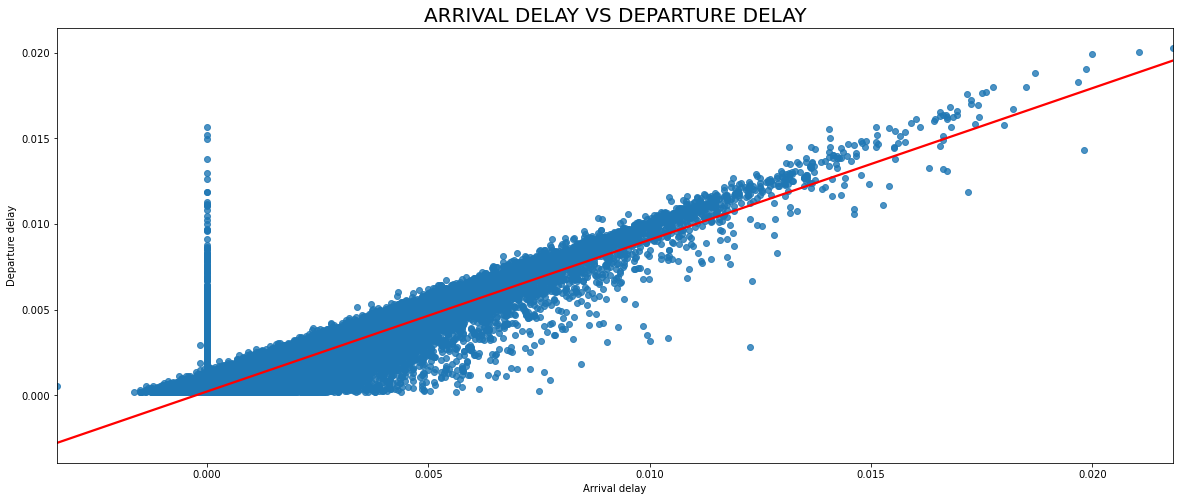

In [15]:
plt.figure(figsize =(20, 8))
sns.regplot(data=scaled_df, x=scaled_df['ArrDelay'], y=scaled_df['DepDelay'], fit_reg=True, line_kws=dict(color="red"))
plt.title("Arrival delay vs departure delay",fontsize=20)
plt.xlabel("Arrival delay")
plt.ylabel("Departure delay")

plt.show()

I would like to remove values of 0, because the predictive model will be better without these outliers.

In [16]:
scaled_df.loc[scaled_df['ArrDelay'] == 0].count()

ArrDelay             8661
DepDelay             8661
Distance             8661
CarrierDelay         8661
WeatherDelay         8661
NASDelay             8661
SecurityDelay        8661
LateAircraftDelay    8661
dtype: int64

In [11]:
#deleting rows with 0 values
scaled_df = scaled_df.loc[scaled_df['ArrDelay'] != 0]
scaled_df.reset_index()
scaled_df['ArrDelay'].count()

368926

Let's check if the dataset is now without outliers.

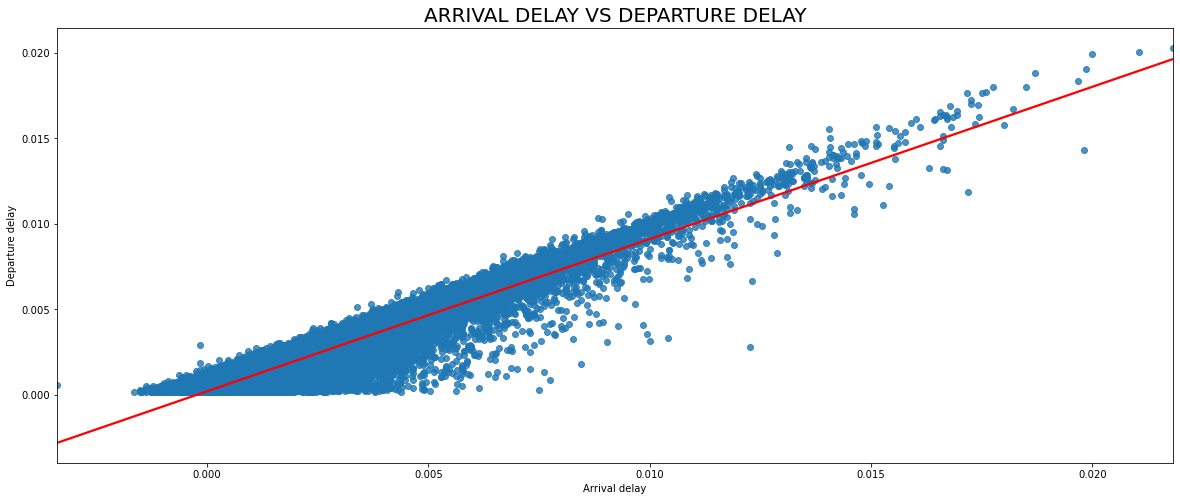

In [18]:
plt.figure(figsize =(20, 8))
sns.regplot(data=scaled_df, x=scaled_df['ArrDelay'], y=scaled_df['DepDelay'], fit_reg=True, line_kws=dict(color="red"))
plt.title("Arrival delay vs departure delay",fontsize=20)
plt.xlabel("Arrival delay")
plt.ylabel("Departure delay")

plt.show()

OK, now I have values with less outliers, hopefully it will help to build better model.

#### Relationship between values

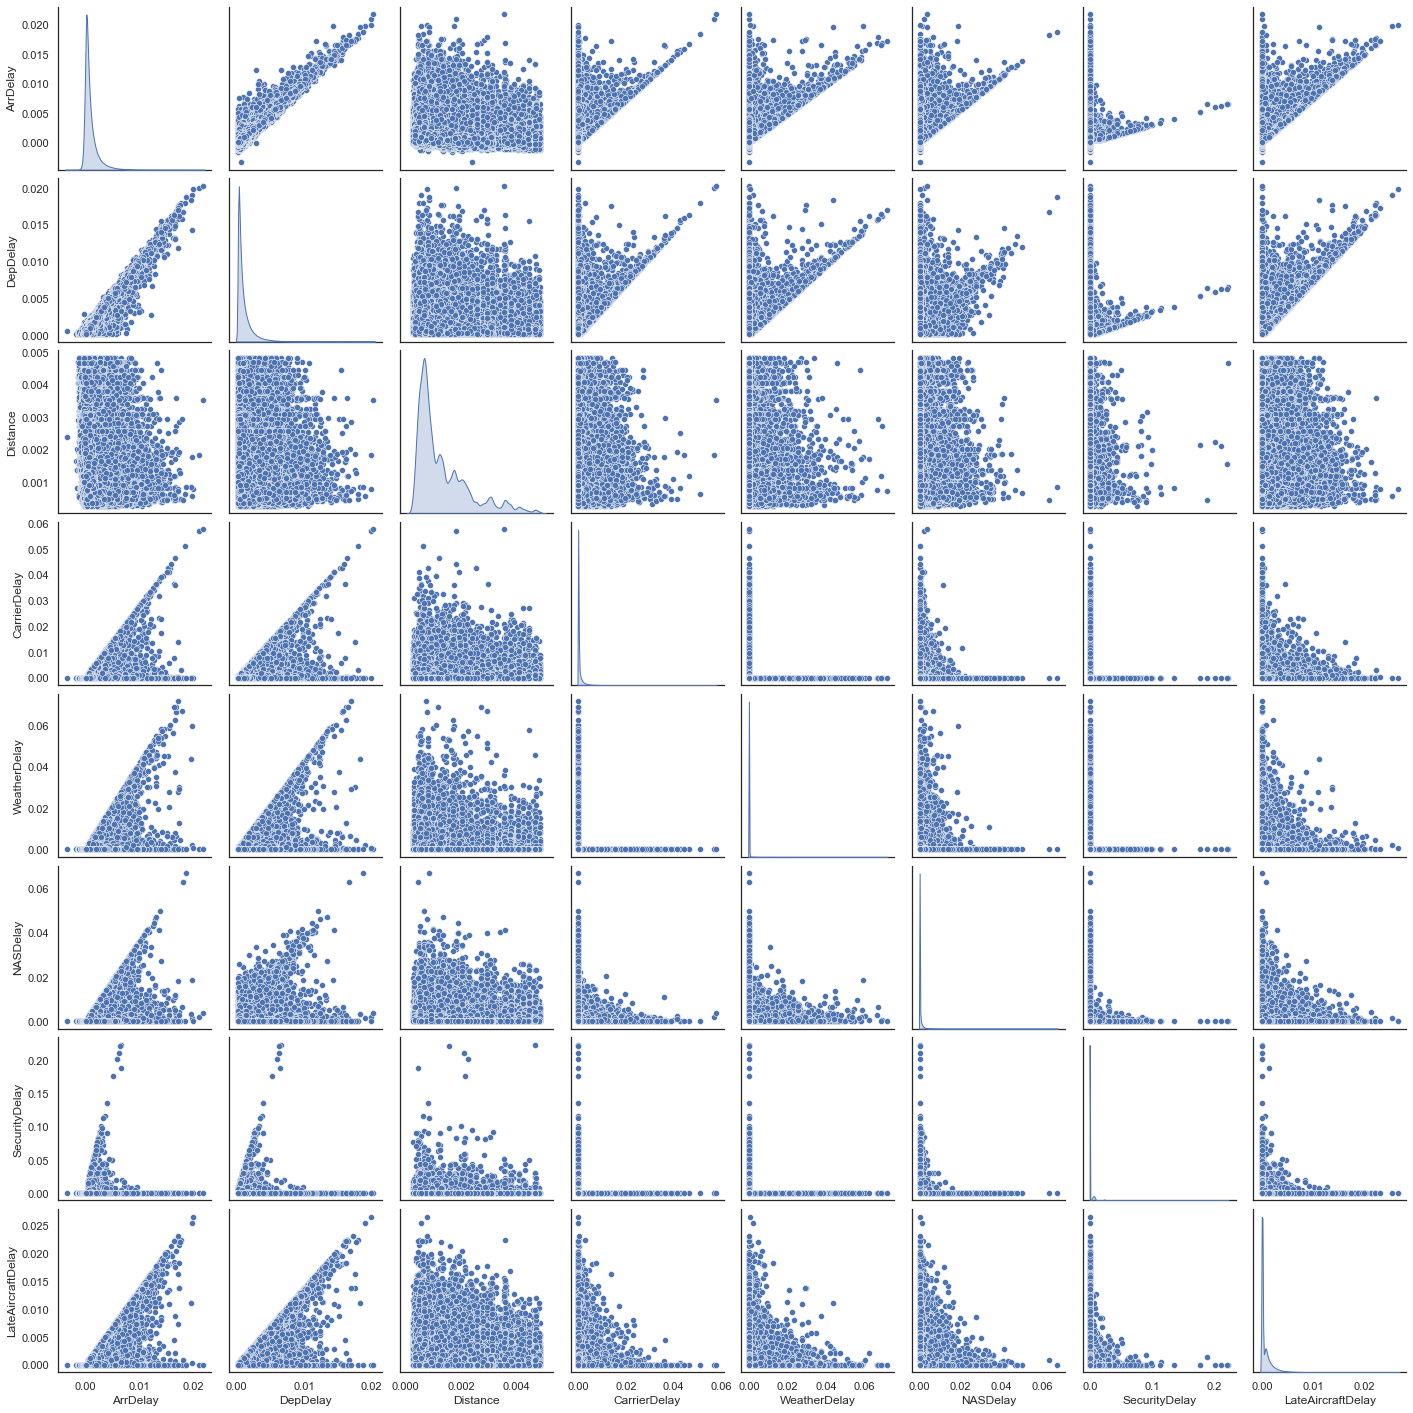

In [74]:
#Relationship between features
sns.pairplot(scaled_df,diag_kind='kde')
plt.show()

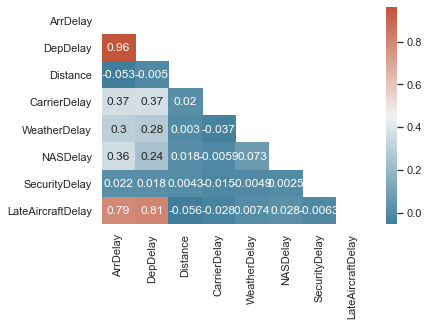

In [168]:
#Correlation matrix
corr = scaled_df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

Interpretation:
- High correlation between departure and arrival delay
- High correlation between departure and late aircraft delay

#### Train & test samples

In [19]:
X = scaled_df.drop('ArrDelay',axis=1)
y = scaled_df['ArrDelay']

In [102]:
#Train 70%, test 30%, test_size is the percentage and random_state is for initilizing random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
X_train.head()

,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
110850,0.007503,0.000995,0.0,0.0,0.000669,0.0,0.010323
198632,0.001094,0.001014,0.0,0.0,0.000000,0.0,0.001337
227441,0.002248,0.000911,0.0,0.0,0.000000,0.0,0.002926
68819,0.000182,0.000450,0.0,0.0,0.000000,0.0,0.000000
308790,0.000608,0.001149,0.0,0.0,0.000000,0.0,0.000669


In [104]:
y_train.head()

110850    0.007864
198632    0.000995
227441    0.002176
68819     0.000093
308790    0.000497
Name: ArrDelay, dtype: float64

In [105]:
X_test.head()

,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
326727,0.000425,0.004447,0.001209,0.0,0.000111,0.0,0.000000
116699,0.000729,0.000664,0.000000,0.0,0.000000,0.0,0.001003
194753,0.002461,0.000926,0.000086,0.0,0.000000,0.0,0.003009
65572,0.000213,0.000580,0.000000,0.0,0.000000,0.0,0.000000
56932,0.001914,0.001805,0.000518,0.0,0.000000,0.0,0.001630


In [108]:
y_test.count()

110678

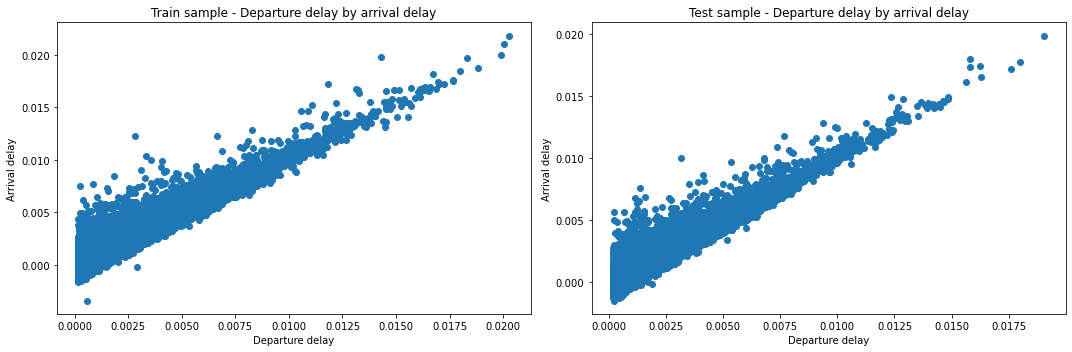

In [25]:
#display the train and test set
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].plot(X_train['DepDelay'],y_train,'o')
axes[0].set_title("Train sample - Departure delay by arrival delay")
axes[0].set_xlabel("Departure delay")
axes[0].set_ylabel("Arrival delay")

axes[1].plot(X_test['DepDelay'],y_test,'o')
axes[1].set_title("Test sample - Departure delay by arrival delay")
axes[1].set_xlabel("Departure delay")
axes[1].set_ylabel("Arrival delay")

plt.tight_layout();

Regression model: Strong positive relationship between arrival delay and departure delay. That means that we would get good model for machine learning. It looks like my training sample is quite similar to original dataset so the random selection worked well.

#### Linear regression model

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)
test_predictions

array([ 3.63104900e-04,  7.92033039e-04,  2.31232709e-03, ...,
        5.22320471e-04, -1.47671886e-05,  3.29510755e-03])

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
print(MAE)

0.00010737142803281052


#### Comparing original and predicted values from linear regression model

In [117]:
#compare values from y_train and y_prediction
y1 = y_test.reset_index(drop=True)
y2 = pd.Series(model.predict(X_test))

In [170]:
#original values from test sample - 110678 total
y1.count()

110678

In [171]:
#predicted values based on test sample - 110678 total
y2.count()

110678

In [157]:
#for simple visualization let's take sistematic sample
step_num = 1000

def randomNum():
    num = np.random.randint(1, 50)
    return num
num = randomNum()

In [158]:
simple_df1 = y1[num:len(y1):step_num]
simple_df2 = y2[num:len(y2):step_num]

print(simple_df1.count(),simple_df2.count())

111 111


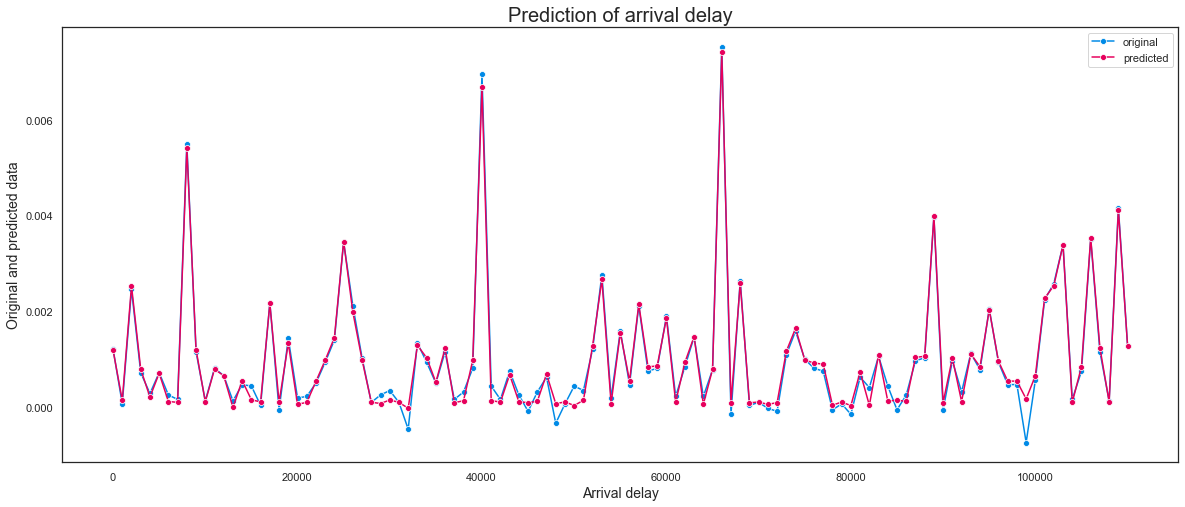

In [167]:
plt.figure(figsize =(20, 8))

sns.lineplot(data=simple_df1, color='#008ae6',label='original', marker='o')
sns.lineplot(data=simple_df2, color='#e6005c',label='predicted', marker='o')
plt.title("Prediction of arrival delay",fontsize=20)
plt.xlabel("Arrival delay",fontsize=14)
plt.ylabel("Original and predicted data",fontsize=14)

plt.show()

## Level 2

### Exercise 2

#### Transformation process, standardization, dummies or polynomial regression.

We can transform names of airlines to dummies values and than compare arrival and departure delay.

In [12]:
df_flights.tail()

,UniqueCarrier,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,DL,25.0,30.0,906,3.0,0.0,0.0,0.0,22.0
1936754,DL,75.0,57.0,481,0.0,57.0,18.0,0.0,0.0
1936755,DL,99.0,80.0,689,1.0,0.0,19.0,0.0,79.0
1936756,DL,9.0,11.0,533,0.0,0.0,0.0,0.0,0.0
1936757,DL,-5.0,7.0,874,0.0,0.0,0.0,0.0,0.0


In [13]:
a = df_flights.drop('UniqueCarrier',axis=1)
b = df_flights['UniqueCarrier']
a['Total'] = a.sum(axis=1)
df_mod = a[['Total','ArrDelay','DepDelay','WeatherDelay']]
df_mod.head(2)

,Total,ArrDelay,DepDelay,WeatherDelay
0,804.0,-14.0,8.0,0.0
1,831.0,2.0,19.0,0.0


In [14]:
#dummy variables from cathegorical values - UniqueCarrier
dummy1 = pd.get_dummies(df_flights['UniqueCarrier'])
dummy1.head(2)

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df_airlines = df_mod.merge(dummy1, left_index=True, right_index=True)
df_airlines.head()

,Total,ArrDelay,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,804.0,-14.0,8.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,831.0,2.0,19.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,537.0,14.0,8.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,617.0,34.0,34.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,724.0,11.0,25.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing
names = df_airlines.columns

d = preprocessing.normalize(df_airlines, axis=0)
scaled_df2 = pd.DataFrame(d, columns=names)
scaled_df2.head()

,Total,ArrDelay,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0.000539,-0.000143,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
1,0.000557,0.000020,0.000199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
2,0.000360,0.000143,0.000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
3,0.000414,0.000346,0.000356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
4,0.000485,0.000112,0.000262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0


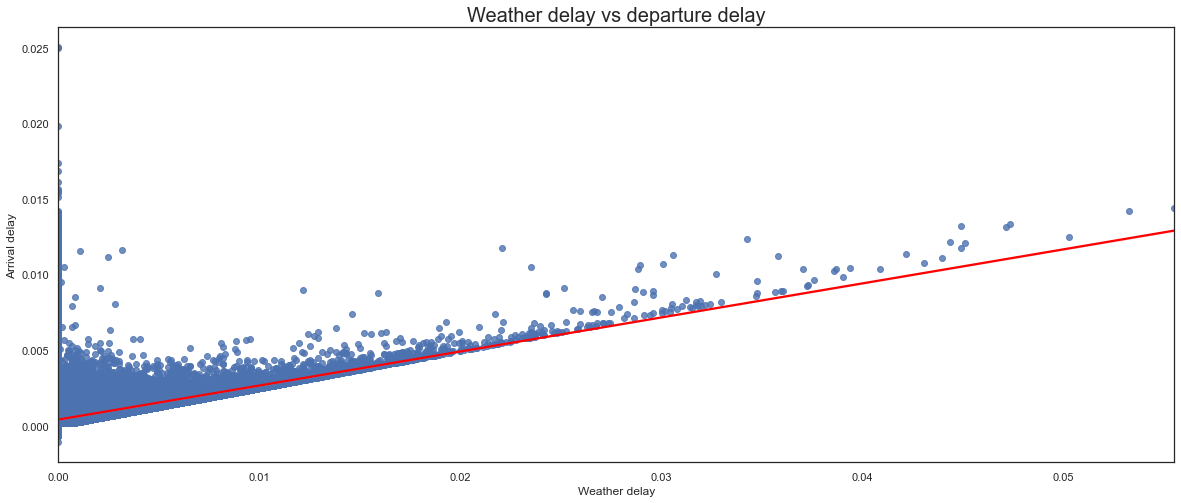

In [184]:
plt.figure(figsize =(20, 8))
sns.regplot(data=scaled_df2, x=scaled_df2['WeatherDelay'], y=scaled_df2['ArrDelay'], fit_reg=True, line_kws=dict(color="red"))
plt.title("Weather delay vs departure delay",fontsize=20)
plt.xlabel("Weather delay")
plt.ylabel("Arrival delay")

plt.show()

In [17]:
#deleting rows with 0 values
scaled_df2 = scaled_df2.loc[scaled_df2['WeatherDelay'] != 0]
scaled_df2.reset_index()
scaled_df2.head()

,Total,ArrDelay,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
294,0.000481,0.001313,0.001288,0.000985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
302,0.000343,0.000702,0.000680,0.000493,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
512,0.000236,0.000234,0.000230,0.000903,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
543,0.000413,0.000163,0.000073,0.000287,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
560,0.001077,0.000254,0.000366,0.001026,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0


#### Train & test samples

In [18]:
X = scaled_df2.drop('ArrDelay',axis=1)
y = scaled_df2['ArrDelay']

In [19]:
#Train 70%, test 30%, test_size is the percentage and random_state is for initilizing random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.head(2)

,Total,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,DL,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
439149,0.000346,0.000419,0.001519,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.002749,0.0,0.0,0.0,0.0,0.0
153898,0.000774,0.000283,0.000411,0.0,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [21]:
y_train.count()

69242

In [22]:
X_test.head(2)

,Total,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,DL,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
1497870,0.000292,0.000597,0.002340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.003556,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1825422,0.001376,0.000168,0.000082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.003188,0.0,0.0,0.0


In [23]:
y_test.count()

29676

#### Linear regression model

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
y_train_pred

array([0.00052937, 0.00039942, 0.00067494, ..., 0.00070146, 0.00298715,
       0.00068329])

In [29]:
y_test_pred

array([0.00072627, 0.0004436 , 0.00167635, ..., 0.00099348, 0.00051966,
       0.00037306])

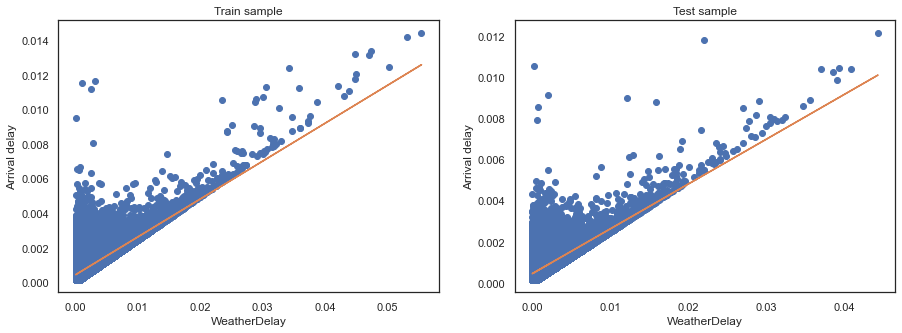

In [203]:
#display the prediction set
from numpy.polynomial.polynomial import polyfit

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
x1 = X_train['WeatherDelay']
y1 = y_train_pred
x2 = X_test['WeatherDelay']
y2 = y_test_pred
a, m = polyfit(x1, y1, 1)
b, n = polyfit(x2, y2, 1)

axes[0].plot(X_train['WeatherDelay'],y_train,'o')
axes[0].set_title("Train sample")
axes[0].set_xlabel("WeatherDelay")
axes[0].set_ylabel("Arrival delay")
axes[0].plot(x1, a + m * x1)

axes[1].plot(X_test['WeatherDelay'],y_test,'o')
axes[1].set_title("Test sample")
axes[1].set_xlabel("WeatherDelay")
axes[1].set_ylabel("Arrival delay")
axes[1].plot(x2, b + n * x2)

plt.show()

#### Polynomial regression model

Polynomical regression - I will try to create the same model but with polynomical features.
- https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
- https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
    
y_train_predict = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2_train = r2_score(y_train, y_train_predict)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
    
print("The model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))

print("The model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))

The model performance for the training set
RMSE of training set is 0.0002553387408891673
The model performance for the test set
RMSE of test set is 0.00025607382388206316


In [31]:
y_train_predict

array([0.00052213, 0.00039373, 0.00066238, ..., 0.00068698, 0.00326918,
       0.00070561])

In [32]:
y_test_predict

array([0.00072525, 0.00045957, 0.00169691, ..., 0.00100872, 0.0005155 ,
       0.00036335])

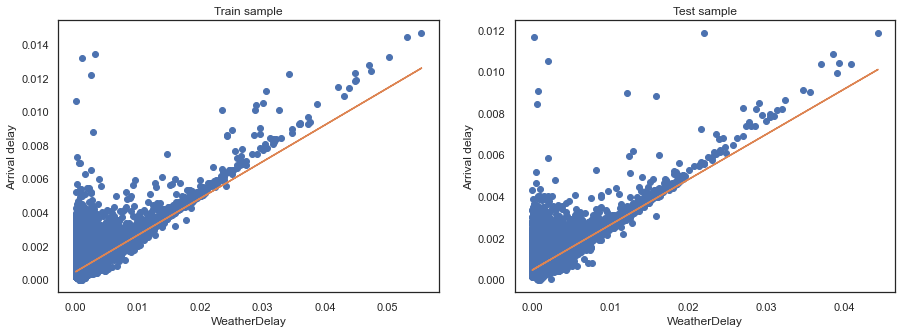

In [207]:
#display the prediction set
from numpy.polynomial.polynomial import polyfit

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
x1 = X_train['WeatherDelay']
y1 = y_train_predict
x2 = X_test['WeatherDelay']
y2 = y_test_predict
a, m = polyfit(x1, y1, 1)
b, n = polyfit(x2, y2, 1)

axes[0].plot(X_train['WeatherDelay'],y_train_predict,'o')
axes[0].set_title("Train sample")
axes[0].set_xlabel("WeatherDelay")
axes[0].set_ylabel("Arrival delay")
axes[0].plot(x1, a + m * x1)

axes[1].plot(X_test['WeatherDelay'],y_test_predict,'o')
axes[1].set_title("Test sample")
axes[1].set_xlabel("WeatherDelay")
axes[1].set_ylabel("Arrival delay")
axes[1].plot(x2, b + n * x2)

plt.show()

Interpretation:
- Polynomial fit seems to get better result than linear regression prediction method.
- The outliers of 0 vaules of WeatherDelay has been removed but there are still other outliers that might cause less accuracy.

## Level 3

### Exercise 3

##### Summary of new columns, statistics and diagrams.

In [33]:
scaled_df2.head()

,Total,ArrDelay,DepDelay,WeatherDelay,9E,AA,AQ,AS,B6,CO,...,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
294,0.000481,0.001313,0.001288,0.000985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
302,0.000343,0.000702,0.000680,0.000493,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
512,0.000236,0.000234,0.000230,0.000903,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
543,0.000413,0.000163,0.000073,0.000287,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
560,0.001077,0.000254,0.000366,0.001026,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0


In [58]:
a = scaled_df2.iloc[:, :4]
a.head()

,Total,ArrDelay,DepDelay,WeatherDelay
294,0.000481,0.001313,0.001288,0.000985
302,0.000343,0.000702,0.000680,0.000493
512,0.000236,0.000234,0.000230,0.000903
543,0.000413,0.000163,0.000073,0.000287
560,0.001077,0.000254,0.000366,0.001026


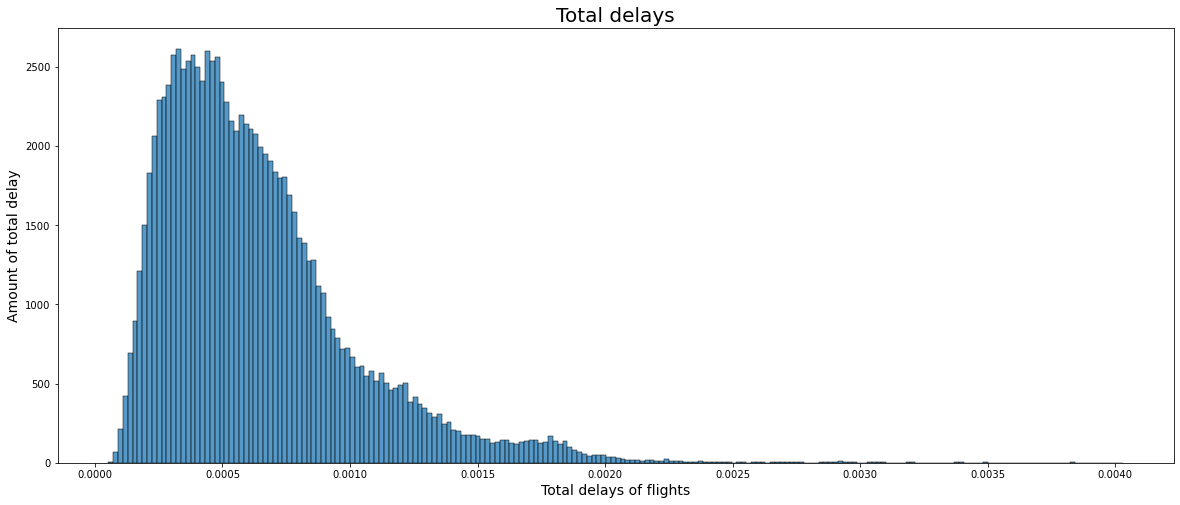

In [54]:
plt.figure(figsize =(20, 8))

plt.title("Total delays",fontsize=20)
plt.xlabel("Total delays of flights",fontsize=14)
plt.ylabel("Amount of total delay",fontsize=14)
sns.histplot(data=scaled_df2, x="Total")

plt.show()

In [71]:
b = scaled_df2.iloc[:,4:]
b.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0
560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001627,0.0,0.0


In [102]:
c = scaled_df2.loc[scaled_df2['WN'] != 0]
d = scaled_df2.loc[scaled_df2['B6'] != 0]
e = scaled_df2.loc[scaled_df2['YV'] != 0]

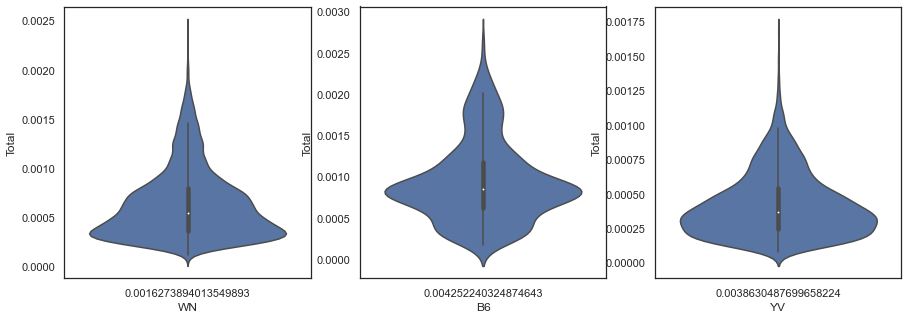

In [103]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.violinplot(x=c["WN"], y=c["Total"],ax = ax[0])
sns.violinplot(x=d["B6"], y=d["Total"],ax = ax[1])
sns.violinplot(x=e["YV"], y=e["Total"],ax = ax[2])
plt.show()

Density of total delays by Airlines.
- WN:Southwest Airlines
- B6:JetBlue Airways
- YV:Mesa Airlines

#### Comparing original and predicted values from polynomial model

In [104]:
y1 = y_test.reset_index(drop=True)
y2 = pd.Series(y_test_predict)

In [105]:
#original values from test sample - 110678 total
y1.count()

29676

In [106]:
#predicted values based on test sample - 110678 total
y2.count()

29676

In [109]:
#for simple visualization let's take sistematic sample
step_num = 100

def randomNum():
    num = np.random.randint(1, 50)
    return num
num = randomNum()

In [110]:
simple_df1 = y1[num:len(y1):step_num]
simple_df2 = y2[num:len(y2):step_num]

print(simple_df1.count(),simple_df2.count())

297 297


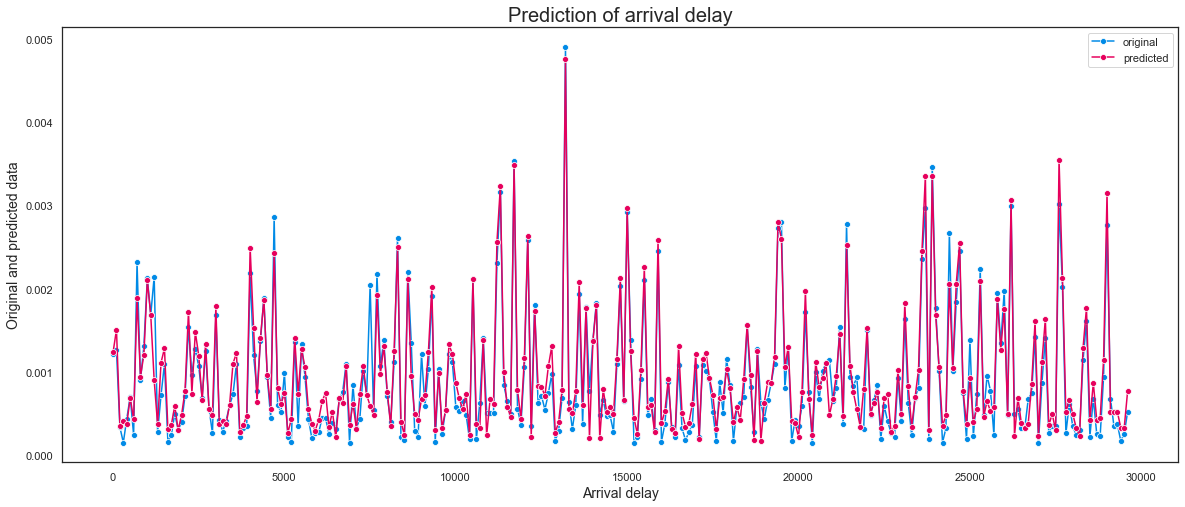

In [111]:
plt.figure(figsize =(20, 8))

sns.lineplot(data=simple_df1, color='#008ae6',label='original', marker='o')
sns.lineplot(data=simple_df2, color='#e6005c',label='predicted', marker='o')
plt.title("Prediction of arrival delay",fontsize=20)
plt.xlabel("Arrival delay",fontsize=14)
plt.ylabel("Original and predicted data",fontsize=14)

plt.show()

### Notes

- https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
- https://realpython.com/train-test-split-python-data/
- https://pycaret.org/sampling/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html